# Baseline Notebook

In [1]:
!pip install git+https://github.com/huggingface/diffusers.git -q

# Imports

In [22]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import LDMSuperResolutionPipeline
import torch
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "CompVis/ldm-super-resolution-4x-openimages"

In [24]:
# load model and scheduler
pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)

In [26]:
low_res_img_1 = Image.open("/kaggle/input/image-stitching-from-drone-capture-opencv/drone/image_0081.jpg").resize((128,128))
low_res_img_2 = Image.open("/kaggle/input/image-stitching-from-drone-capture-opencv/drone/image_0091.jpg").resize((128,128))
low_res_img_3 = Image.open("/kaggle/input/image-stitching-from-drone-capture-opencv/drone/image_0101.jpg").resize((128,128))

# LR Image

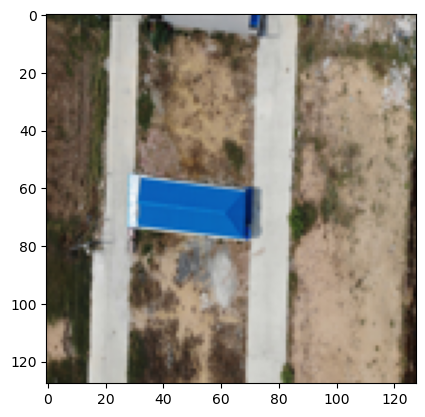

In [27]:
plt.imshow(low_res_img_1)
plt.show()

In [28]:
upscaled_image_1 = pipeline(low_res_img_1, num_inference_steps=100, eta=1).images[0]
upscaled_image_2 = pipeline(low_res_img_2, num_inference_steps=100, eta=1).images[0]
upscaled_image_3 = pipeline(low_res_img_3, num_inference_steps=100, eta=1).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [29]:
# save image
upscaled_image_1.save("ldm_generated_image_1.png")
upscaled_image_2.save("ldm_generated_image_2.png")
upscaled_image_3.save("ldm_generated_image_3.png")

# HR Image

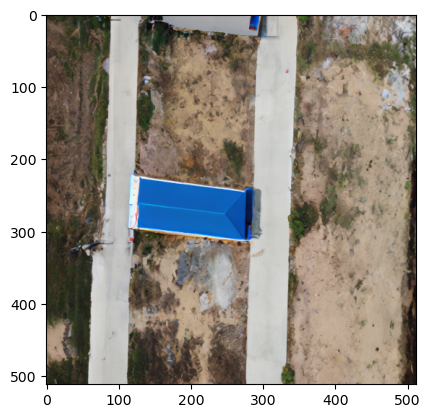

In [35]:
plt.imshow(upscaled_image_1)
plt.show()

In [31]:
!pip install stitching -q

In [32]:
import stitching

In [33]:
stitcher = stitching.Stitcher()
settings = {"detector": "sift", "confidence_threshold": 0.2}
panorama = stitcher.stitch(["/kaggle/working/ldm_generated_image_1.png", "/kaggle/working/ldm_generated_image_3.png", "/kaggle/working/ldm_generated_image_2.png"])

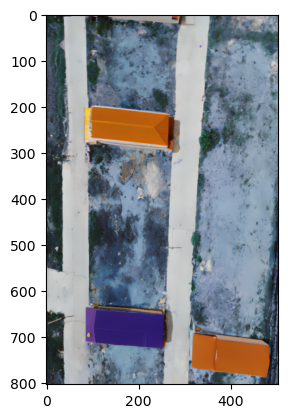

In [34]:
plt.imshow(panorama)
plt.show()